### *Applied AI Foundations: An introudction to your AI Journey*

<hr>

# Introduction to Deep Learning with Python
### Sumudu Tennakoon, PhD

*www.datasciencefoundations.com*
<hr>

In this notebook we will explore how to use Python libraries Pandas and Scikit-Learn. We first explore how we can use Pandas to handle tabular data sets using the Data Frame concept. An exmaple on how to build machine learning model using Scikit-Learn is also demonstrated.

To learn more about Python, refer to the following websites
- Python : www.python.org

To learn more about the Python packages we explore in this notebook, refeer to the following websites

- NumPy : www.numpy.org
- Matplotlib : www.matplotlib.org
- Pandas : https://pandas.pydata.org
- Pytorch : https://pytorch.org

## 1. Load Dataset

**Dataset Source: The CIFAR-10 dataset**
* https://www.cs.toronto.edu/~kriz/cifar.html
* Learning Multiple Layers of Features from Tiny Images, Alex Krizhevsky, 2009 (https://www.cs.toronto.edu/~kriz/learning-features-2009-TR.pdf)




In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

# Load CIFAR-10 dataset
transform = transforms.ToTensor()
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)




### Explore Image Data

In [2]:
# First Record
trainset[0]

(tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
          [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
          [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
          ...,
          [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
          [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
          [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],
 
         [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
          [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
          [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
          ...,
          [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
          [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
          [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],
 
         [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
          [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
          [0.0824, 0.0000, 0.0314,  ...,

In [3]:
print("Image:", trainset[0][0])
print("Label:", trainset[0][1])

Image: tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
         [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
         [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
         ...,
         [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
         [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
         [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],

        [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
         [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
         [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
         ...,
         [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
         [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
         [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],

        [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
         [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
         [0.0824, 0.0000, 0.0314,  ..., 0.1961, 0.1

### Display Image Data

In [4]:
class_number_to_label = {0:'airplane',
                         1:'automobile',
                         2:'bird',
                         3:'cat',
                         4:'deer',
                         5:'dog',
                         6:'frog',
                         7:'horse',
                         8:'ship',
                         9:'truck'
}

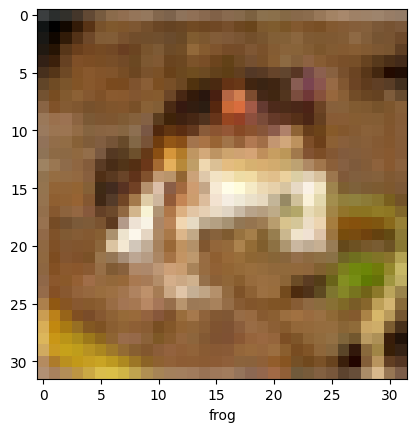

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Get the first image from the training set
image_tensor = trainset[0][0]  # shape: [3, 32, 32] → RGB channels first
image_label = trainset[0][1]

# Convert to NumPy and rearrange dimensions to [height, width, channels]
image_np = image_tensor.permute(1, 2, 0).numpy()

# Display the image
plt.imshow(image_np)
plt.xlabel(f"{class_number_to_label[image_label]}")
#plt.grid(False)
plt.show()


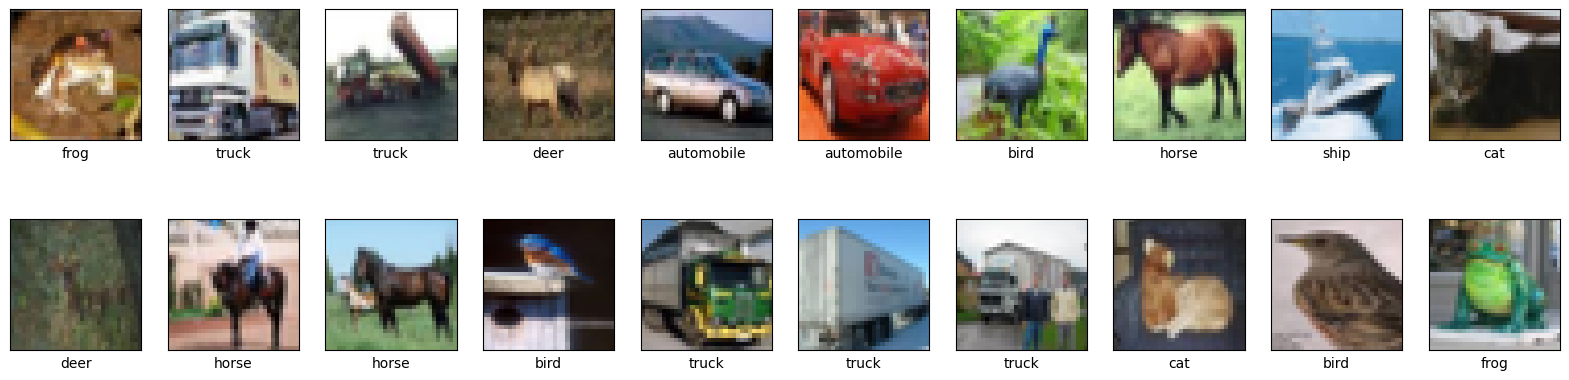

In [6]:
plt.figure(figsize=(20,5))

for i in range(20):
    plt.subplot(2,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # plot image
    image_np = trainset[i][0].permute(1, 2, 0).numpy()
    plt.imshow(image_np)
    #print label
    label= class_number_to_label[image_label]
    plt.xlabel(class_number_to_label[trainset[i][1]])
plt.show()

# 2. Define the CNN model


In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)   # Conv layer: RGB → 64 filters
        #self.bn1 = nn.BatchNorm2d(64)                             # BatchNorm for conv1
        self.pool = nn.MaxPool2d(2, 2)                            # MaxPool: shrink image by half
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1) # Conv layer: 64 → 128 filters
        #self.bn2 = nn.BatchNorm2d(128)                            # BatchNorm for conv2
        self.fc1 = nn.Linear(128 * 8 * 8, 64)                     # Fully connected: flatten → 64 neurons
        self.dropout = nn.Dropout(0.5)                            # Dropout: prevent overfitting
        self.fc2 = nn.Linear(64, 10)                              # Output: 10 classes

    def forward(self, x):
        #x = self.pool(F.relu(self.bn1(self.conv1(x))))            # Conv1 + BN + ReLU + Pool
        #x = self.pool(F.relu(self.bn2(self.conv2(x))))            # Conv2 + BN + ReLU + Pool
        x = self.pool(F.relu(self.conv1(x)))            # Conv1 +  ReLU + Pool
        x = self.pool(F.relu(self.conv2(x)))           # Conv2 + ReLU + Pool
        x = torch.flatten(x, 1)                                   # Flatten feature maps
        x = F.relu(self.fc1(x))                                   # Dense layer with ReLU
        x = self.dropout(x)                                       # Apply dropout
        x = self.fc2(x)                                           # Final output logits
        return x

model = SimpleCNN()
print(model)

SimpleCNN(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=8192, out_features=64, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=64, out_features=10, bias=True)
)


- Conv layers learn patterns in the image (edges, shapes, textures).
- Pooling shrinks the image but keeps important info.
- BatchNorm makes training smoother. → stabilizes training
- Dropout prevents the model from memorizing too much. → reduces overfitting.
- Fully connected layers combine all features to make the final decision



# Complie Model (Prepare to Train)

In [8]:
import torch.optim as optim

# Loss function: compares predictions with correct answers
criterion = nn.CrossEntropyLoss()

# Optimizer: helps the model improve
optimizer = optim.Adam(model.parameters(), lr=0.001) #lr = learning rate


## Train Model

In [ ]:
import matplotlib.pyplot as plt

# Lists to store loss values for each epoch
train_losses = []
val_losses = []

# Training configuration
epochs = 2                # Number of times to loop through the full dataset
batch_size = 128          # Number of images processed at once

# Loop over the dataset multiple times
for epoch in range(epochs):
    running_loss = 0.0    # Total training loss for this epoch
    correct = 0           # Number of correct predictions
    total = 0             # Total number of images seen

    # --- Training loop ---
    model.train()         # Set model to training mode
    for inputs, labels in trainloader:  # Get a batch of images and labels
        optimizer.zero_grad()           # Clear old gradients to avoid mixing updates from previous batches
        outputs = model(inputs)         # Forward pass: model makes predictions on input images to get predicted class scores
        loss = criterion(outputs, labels)  # Calculate how far predictions are from actual labels using a loss function
        loss.backward()                 # Backpropagation: compute gradients for each model parameter based on the loss
        optimizer.step()                # Apply gradients to update model weights and improve predictions

        running_loss += loss.item()     # Add batch loss to total loss

        # Calculate accuracy for this batch
        _, predicted = torch.max(outputs, 1)         # Get predicted class
        total += labels.size(0)                      # Count total images
        correct += (predicted == labels).sum().item()# Count correct predictions

    # Compute average training loss for this epoch
    epoch_train_loss = running_loss / len(trainloader)
    train_losses.append(epoch_train_loss)

    # --- Validation loop ---
    model.eval()          # Set model to evaluation mode
    running_val_loss = 0.0
    with torch.no_grad(): # Disable gradient tracking for validation
        for inputs, labels in testloader:
            outputs = model(inputs)                  # Forward pass
            loss = criterion(outputs, labels)        # Compute validation loss
            running_val_loss += loss.item()

    # Compute average validation loss for this epoch
    epoch_val_loss = running_val_loss / len(trainloader)
    val_losses.append(epoch_val_loss)

    # Print training progress
    print(f"Epoch {epoch+1}, Loss: {epoch_train_loss:.3f}, Accuracy: {100*correct/total:.2f}%")

print("Training finished!")

## Training-Validation Loss Curves

In [ ]:
# Plot Loss Curve
plt.plot(train_losses, label='loss')
plt.plot(val_losses, label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training vs Validation Loss')
plt.show()


## Evaluation

In [34]:
import torch

# --- Evaluation function ---
def evaluate(model, testloader, criterion):
    model.eval()                     # set model to evaluation mode
    test_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():            # no gradients needed for evaluation
        for inputs, labels in testloader:
            outputs = model(inputs)                  # forward pass
            loss = criterion(outputs, labels)        # compute loss
            test_loss += loss.item()                 # accumulate loss

            _, predicted = torch.max(outputs, 1)     # get predicted class
            total += labels.size(0)                  # count total samples
            correct += (predicted == labels).sum().item()  # count correct

    avg_loss = test_loss / len(testloader)           # average loss
    accuracy = 100 * correct / total                 # accuracy percentage
    return avg_loss, accuracy

train samples: 50000
test samples: 10000
Test loss: 1.0897729328483532
Test accuracy: 62.72


In [ ]:
# --- Run evaluation ---
test_loss, test_accuracy = evaluate(model, testloader, criterion)

# --- Print results ---
print('train samples:', len(trainset))
print('test samples:', len(testset))
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)

## Predict and Tabulare Results

In [36]:
import pandas as pd
import torch

# --- Collect actual and predicted values ---
model.eval()
y_act = []
y_pred = []

with torch.no_grad():
    for inputs, labels in testloader:
        outputs = model(inputs)                     # forward pass
        _, predicted = torch.max(outputs, 1)        # get predicted class index

        # Store actual and predicted labels
        y_act.extend(labels.cpu().numpy())          # move to CPU + numpy
        y_pred.extend(predicted.cpu().numpy())

# --- Create DataFrame with actual vs predicted ---
test_result = pd.DataFrame({
    'y_act': y_act,
    'y_pred': y_pred
})

# Show 5 random samples
print(test_result.sample(5))


      y_act  y_pred
4701      0       0
67        2       0
7930      2       0
6857      2       2
4697      5       3


In [37]:
test_result = test_result.replace(class_number_to_label)
test_result.sample(5)

,y_act,y_pred
7673,dog,dog
8044,truck,truck
9627,deer,deer
3400,frog,airplane
6534,horse,horse


## Confusion Matrix

In [38]:
cfm = pd.crosstab(test_result['y_act'], test_result['y_pred'], margins=True)
cfm

y_pred,airplane,automobile,bird,cat,deer,dog,frog,horse,ship,truck,All
y_act,,,,,,,,,,,
airplane,606,14,105,32,10,8,15,12,157,41,1000
automobile,17,700,12,20,8,9,25,10,62,137,1000
bird,75,1,468,96,107,111,81,33,18,10,1000
cat,5,1,107,460,37,257,79,30,12,12,1000
deer,24,0,168,95,458,63,124,53,13,2,1000
dog,6,1,81,187,30,632,20,35,6,2,1000
frog,2,2,48,96,31,25,784,4,5,3,1000
horse,9,1,59,47,71,141,6,659,4,3,1000
ship,53,26,24,34,2,11,15,6,811,18,1000


<Axes: xlabel='y_pred', ylabel='y_act'>

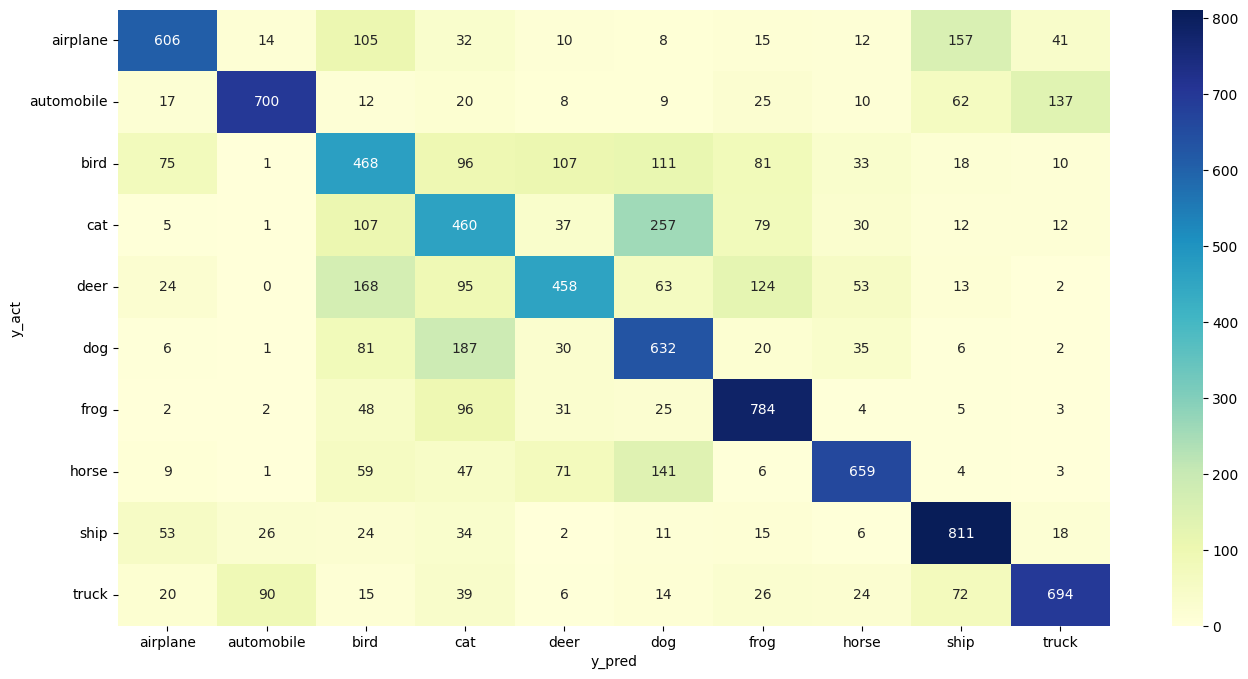

In [40]:
import seaborn as sns

plt.figure(figsize=(16,8))
sns.heatmap(pd.crosstab(test_result.y_act, test_result.y_pred, margins=False), annot=True, cmap="YlGnBu", fmt=".0f")

In [41]:
class_label = cfm.index
TP = cfm.values.diagonal()
class_samples = cfm.loc[:,'All'].values
class_predicted = cfm.loc['All',:].values

model_performace = pd.DataFrame({"Clas":class_label, "TP":TP, "Samples":class_samples, "Predicted":class_predicted})
model_performace["Precision"] = model_performace["TP"]/model_performace["Predicted"]
model_performace["Recall"] = model_performace["TP"]/model_performace["Samples"]
model_performace.style.background_gradient()

,Clas,TP,Samples,Predicted,Precision,Recall
0,airplane,606,1000,817,0.741738,0.606000
1,automobile,700,1000,836,0.837321,0.700000
2,bird,468,1000,1087,0.430543,0.468000
3,cat,460,1000,1106,0.415913,0.460000
4,deer,458,1000,760,0.602632,0.458000
5,dog,632,1000,1271,0.497246,0.632000
6,frog,784,1000,1175,0.667234,0.784000
7,horse,659,1000,866,0.760970,0.659000
8,ship,811,1000,1160,0.699138,0.811000
9,truck,694,1000,922,0.752711,0.694000


## Check Results

* Identify Ambigious Casses
* Check examples of false positives (model confused predictions)


In [ ]:
# Create IMage Data Column
test_result['Image'] = list(testset)

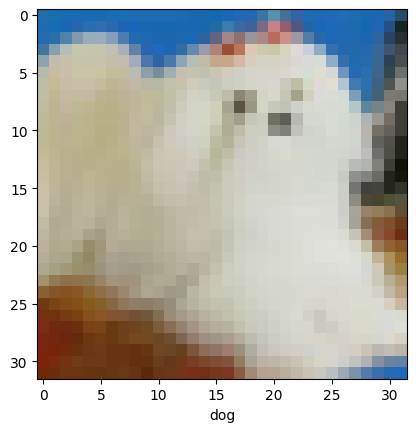

In [44]:
sample = test_result.sample()['Image'].values[0]
image_np = sample[0].permute(1, 2, 0).numpy()
plt.xlabel(f"{class_number_to_label[sample[1]]}")
plt.imshow(image_np)

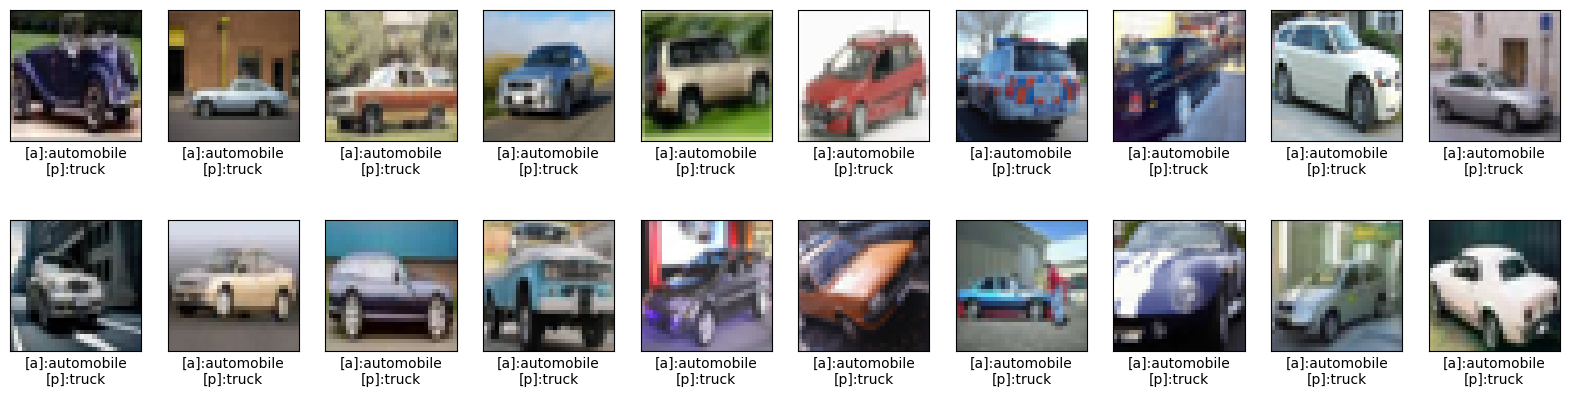

In [60]:
sample_images = test_result.query("y_act=='automobile' and y_pred=='truck'").sample(20)

plt.figure(figsize=(20,5))

for i in range(20):
    plt.subplot(2,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    sample = sample_images.iloc[i]['Image']
    y_act = sample_images.iloc[i]['y_act']
    y_pred = sample_images.iloc[i]['y_pred']
    # plot image
    image_np = sample[0].permute(1, 2, 0).numpy()
    plt.imshow(image_np)
    plt.xlabel(f"[a]:{y_act}\n[p]:{y_pred}")

plt.show()


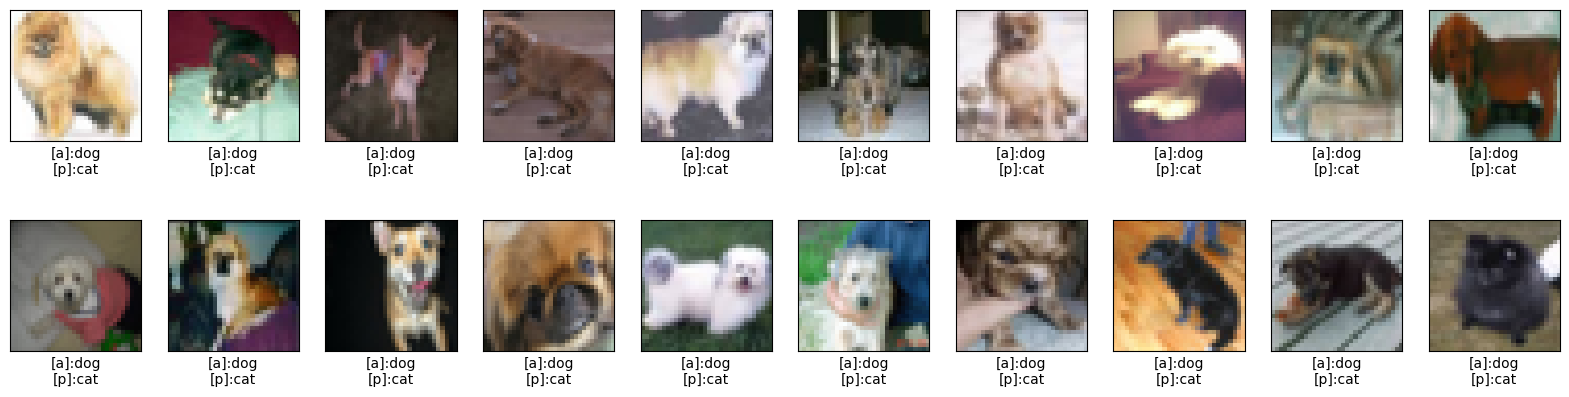

In [61]:
sample_images = test_result.query("y_act=='dog' and y_pred=='cat'").sample(20)

plt.figure(figsize=(20,5))

for i in range(20):
    plt.subplot(2,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    sample = sample_images.iloc[i]['Image']
    y_act = sample_images.iloc[i]['y_act']
    y_pred = sample_images.iloc[i]['y_pred']
    # plot image
    image_np = sample[0].permute(1, 2, 0).numpy()
    plt.imshow(image_np)
    plt.xlabel(f"[a]:{y_act}\n[p]:{y_pred}")

plt.show()


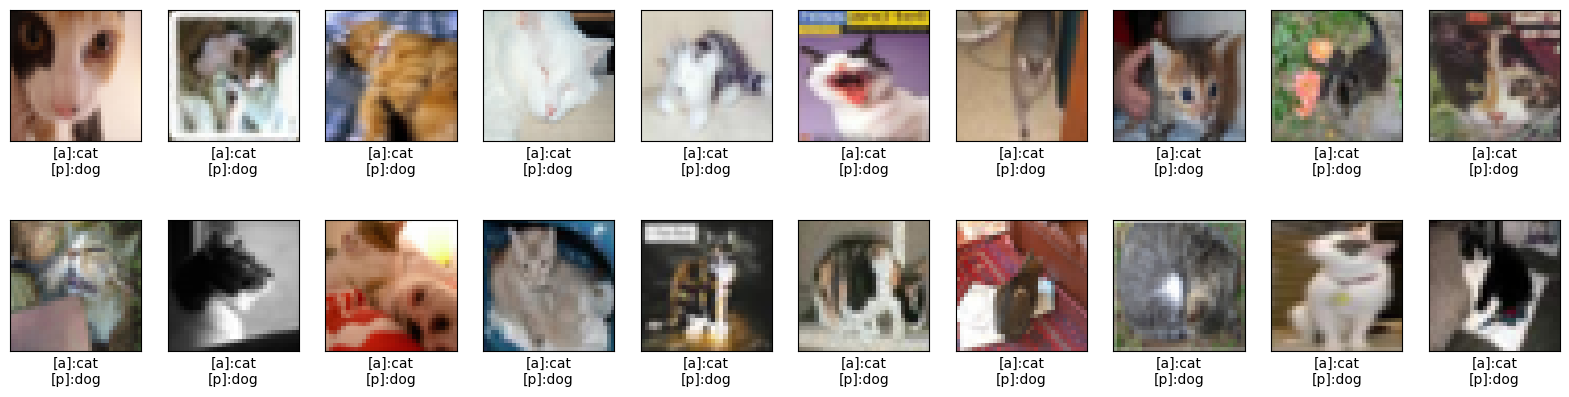

In [62]:
sample_images = test_result.query("y_act=='cat' and y_pred=='dog'").sample(20)

plt.figure(figsize=(20,5))

for i in range(20):
    plt.subplot(2,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    sample = sample_images.iloc[i]['Image']
    y_act = sample_images.iloc[i]['y_act']
    y_pred = sample_images.iloc[i]['y_pred']
    # plot image
    image_np = sample[0].permute(1, 2, 0).numpy()
    plt.imshow(image_np)
    plt.xlabel(f"[a]:{y_act}\n[p]:{y_pred}")

plt.show()




<hr>
Last update 2025-11-25 by Sumudu Tennakoon

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.